### *Recommendation System*


                                            Overview  
While visiting a shopping mall, many salesmen often try to recommend the customers exciting deals and offers that might of interest them. Similarly, e-commerce sites use recommender systems to suggest products to their customers that they are highly likely to buy. 


                                            Problem Statement 
This project will build collaborative filtering algorithm based recommender system.


                                            Data Description 
The data is contained in a csv file, named ’ratings_beauty.csv’. 
It has four types of values: user IDs, product IDs, ratings, and timestamp. 

* User IDs: anonymized IDs of reviewers. (Customer Identification)

* Product IDs: anonymized IDs of products. (Amazon's unique product identification code for each product)

* Ratings are the feedback provided by the user corresponding to a product in that row between 1-5 based on customer satisfaction.  

* Timestamp represents the time at which user submitted the rating. 

The file has about 2 million reviews and ratings for beauty products available on Amazon.


                                            Introduction
                                        
The Recommender systems are used by most E-commerce sites to suggest products to their customers and also  provide consumers with information to assist them on the product to purchase. The products can be recommended based on the top sellers on a site, on the demographics of the consumer, or on an analysis of the customer's past buying behavior, this helps as a way of predicting future buying patters of customers. Customer ratings are a very helpful source as it is seen to be the way out for a customer to tell you honestly how they feel about a product and this could help the business with insights to what a customer like or do not about a paticular product or service. 

Amazon currently makes use of the item-item collaborative filtering method, which scales through very huge datasets and then produces a high quality real time recommendation systems. This system work as an information filtering system which seeks to predict the
"rating" or preferences of the user interest. 

Amazon depends so much on a Recommendation engine that reviews customer ratings and history of purhase to recommend items and improve sales.The Product recommendations tailored to users are likely to lead to a better and higher conversion rate. Recommended products account for about 35% of Amazon revenue (MacKenzie) .Also, users are always interested in recommendations of similar items that enable them discover new products and maybe compare items as well. 

In [112]:
# importing required libaries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [113]:
# loading and the datasets
ratings_data = pd.read_csv('data/ratings_Beauty.csv.zip')

### Exploratory Data Analysis

Exploratory data analysis helps analysts to be able to represent different trends in sales graphically and then show it by visualizing the data related to the best-selling product categories, spending patterns in customers, demographics and preferences of customers, and units sold over a period of time.

In [114]:
# vewing the dataset
ratings_data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [115]:
# a view of all the column
ratings_data.columns

Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')

                                                     Inference

From the operation above, we can see clearly that the column names are not well organized, hence, we have to perform a renaming operation.

In [165]:
# renaming column
ratings_data.columns = ['User_ID', 'Product_ID', 'Rating', 'Timestamp']
ratings_data.head()

,User_ID,Product_ID,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [166]:
# vewing the dataset from the bottom
ratings_data.tail()

,User_ID,Product_ID,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [118]:
# checking  the size of the dataset
print("The Shape is: ", ratings_data.shape)

The Shape is:  (2023070, 4)


The above operation shows that the dataset contains 2023070 rows (data points) and 4 columns (features).

In [167]:
# checking through the data types
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   User_ID     object 
 1   Product_ID  object 
 2   Rating      float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [168]:
# checking through the data types
ratings_data.dtypes

User_ID        object
Product_ID     object
Rating        float64
Timestamp       int64
dtype: object

In [169]:
# checking for missing values
ratings_data.isnull().sum()

User_ID       0
Product_ID    0
Rating        0
Timestamp     0
dtype: int64

The above operations shows that the dataset is clean and does'nt contain any missing values.

In [38]:
# checking for duplicates 
ratings_data.duplicated().sum()

0

From the duplicate operation we see that there are no duplicates in our datasets.

In [170]:
# stating each category of the datasets
categorical_features = [col for col in ratings_data.columns if ratings_data[col].dtype=='O']
numerical_features = [col for col in ratings_data.columns if ratings_data[col].dtype!='O']
print("The Categorical features are:",categorical_features)
print()
print("The Numerical features are:",numerical_features)

The Categorical features are: ['User_ID', 'Product_ID']

The Numerical features are: ['Rating', 'Timestamp']


In [171]:
# statistical summary of the datasets
ratings_data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [57]:
# total rating for each rating class
ratings_data.value_counts('Rating')

Rating
5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
dtype: int64

<AxesSubplot:ylabel='Rating'>

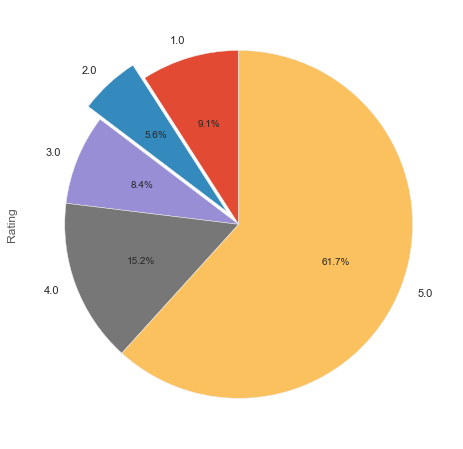

In [154]:
%matplotlib inline
plt.figure(figsize = (12,8))

# Distribution of ratings
ratings_data.groupby('Rating').Rating.count()
ratings_data.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

                                                    Inference

The plot above shows that, customers were happy with the products they bought. About 61.7% customers gave 5 rating, 15.2% customers gave 4 rating, 8.4% customers gave 3 rating, 5.6% customers gave 2 rating, 9.1% customers gave 1 rating for the products they purchased.

c:\Users\USER\Desktop\Capestone Project1\Sales_Forecasting_for_Walmart\capstone_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

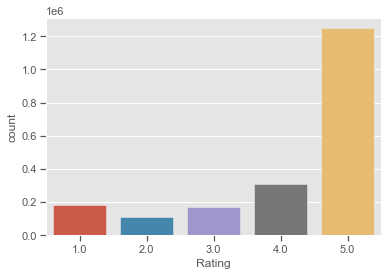

In [122]:
# total count for ratings.
sns.countplot(ratings_data['Rating']) 

In [163]:
# checking unique features
print('unique Users:',len(ratings_data.User_ID.unique())) # unique users
print('unique Product:',len(ratings_data.Product_ID.unique())) # unique product
print('Unique Star Ratings',ratings_data['Rating'].unique()) # unique Ratings
print("The Total Ratings: ",ratings_data.shape[0])

unique Users: 1210271
unique Product: 249274
Unique Star Ratings [5. 3. 4. 1. 2.]
The Total Ratings:  2023070


                                                    Inference
The unique operation displays unique ratings, unique users and unique product. Users that give their rating is 1210271 and the mean of the ratings is 4.1, which means customers would rather give high ratings for products. Also, the Standard deviation and percentiles also show that user that rate product between 1 and 2 is rare.

The star rating  statistics shows that:

183784 customers give 1 star

113034 customers give 2 stars

169791 customers give 3 stars

307740 customers give 4 stars

1248721 customers give 5 stars


In [161]:
# Number of Products with high ratings
high_rated_product = ratings_data[ratings_data['Rating'] >= 4.0]
print('Number of unique product with high rating',len(high_rated_product['Product_ID'].unique()))

Number of unique product with high rating 220746


                                                   Inference
The Number of unique product with high rating  is 220746

#### Top 10 Products Based on Sales

In [135]:
# Top 10 Products based on sales.

a = list(ratings_data['Product_ID'].value_counts())
b = list(ratings_data['Product_ID'].unique())
top_10_products = pd.DataFrame(list(zip(b[0:11],a[0:11])),columns =['Product_ID', 'Count'])
top_10_products

,Product_ID,Count
0,0205616461,7533
1,0558925278,2869
2,0733001998,2477
3,0737104473,2143
4,0762451459,2088
5,1304139212,2041
6,1304139220,1918
7,130414089X,1885
8,130414643X,1838
9,1304146537,1589


<AxesSubplot:xlabel='Product_ID', ylabel='Count'>

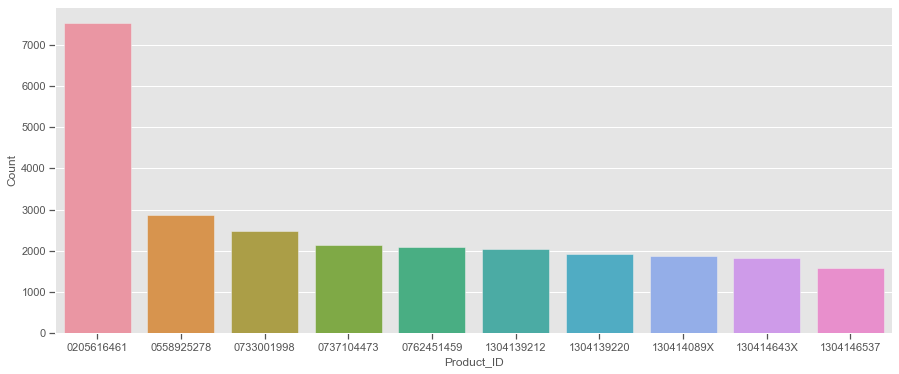

In [149]:
#Barplot of top 10 products.

plt.figure(figsize=(15,6))
sns.barplot(x=top_10_products['Product_ID'].head(10),y=top_10_products['Count'].head(10))

                                                     Inference 

We have the top 10 product based on sales. 

Text(0, 0.5, 'Ratings')

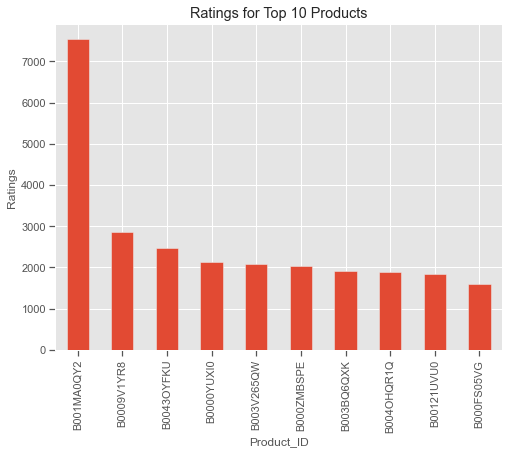

In [173]:
# Reviews for top 10 product 
products = ratings_data["Product_ID"].value_counts()
plt.figure(figsize=(8,6))

# showing the Top 10 selling products Id by ecommerce website
products[:10].plot(kind='bar')
plt.title("Ratings for Top 10 Products")
plt.xlabel('Product_ID')
plt.ylabel('Ratings')

                                           Inference

From the above plot we can see the top 10 product ID for the E-commerce site. B001MA0QY2 is the highest rated product ID by customers on the E-commerce site compared to the others.

This means that, product ID -B001MA0QY2 has over 7000 sales, followed by product Id -B0009V1YR8 with sales of 3000 and so on.

Text(0, 0.5, 'Ratings')

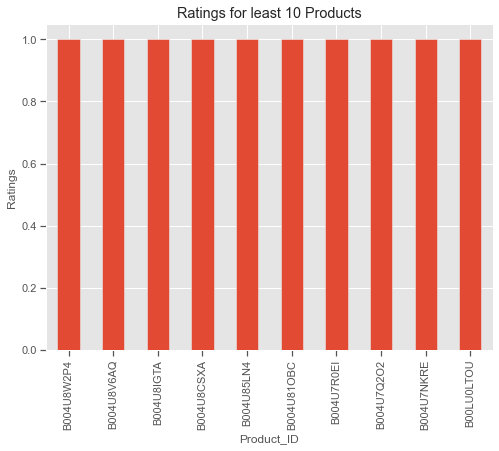

In [175]:
# Ratings for the least 10 product 
products = ratings_data["Product_ID"].value_counts()
plt.figure(figsize=(8,6))
products[-10:].plot(kind='bar')
plt.title("Ratings for least 10 Products")
plt.xlabel('Product_ID')
plt.ylabel('Ratings')

                                                       Inference

From the above plot we can see the least 15 product Id for the E-commerce site. 

#### Top 10 Users Based On The Count Of Their Orders.

In [134]:
a = list(ratings_data['User_ID'].value_counts())
b = list(ratings_data['User_ID'].unique())
top_10_Users = pd.DataFrame(list(zip(b[0:11],a[0:11])),columns =['User_ID', 'Count'])
top_10_Users

,User_ID,Count
0,A39HTATAQ9V7YF,389
1,A3JM6GV9MNOF9X,336
2,A1Z513UWSAAO0F,326
3,A1WMRR494NWEWV,278
4,A3IAAVS479H7M7,276
5,AKJHHD5VEH7VG,275
6,A1BG8QW55XHN6U,269
7,A22VW0P4VZHDE3,259
8,A3V3RE4132GKRO,249
9,A327B0I7CYTEJC,225


<AxesSubplot:xlabel='User_ID', ylabel='Count'>

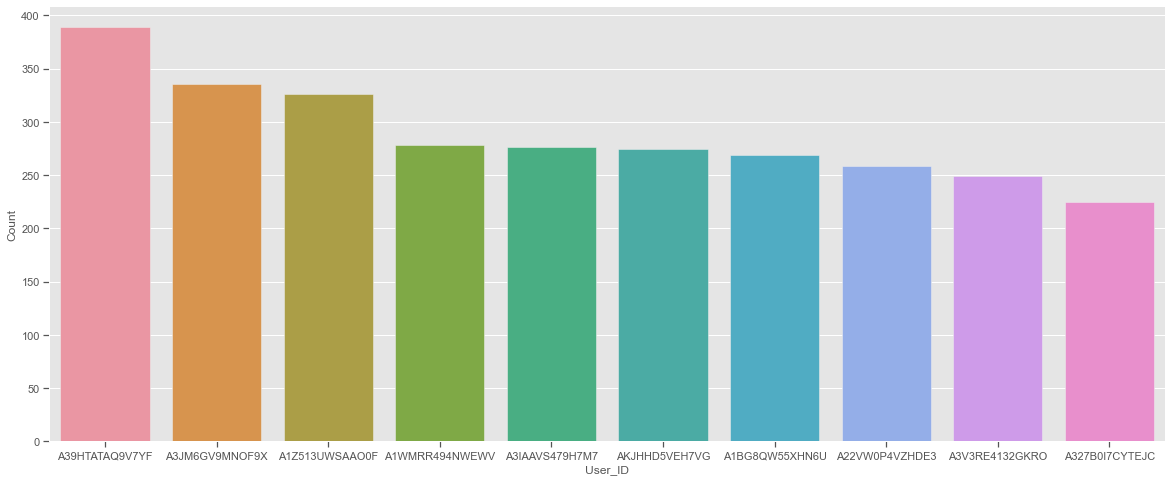

In [153]:
# Barplot of top 5 Users.

plt.figure(figsize=(20,8))
sns.barplot(x=top_10_Users['User_ID'].head(10),y=top_10_Users['Count'].head(10))

In [46]:
# knowing the rating given by each of the users
ratings_data.groupby('Rating')['User_ID'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: User_ID, dtype: int64

#### What is Collaborative Filtering?
 
Collaborative Filtering is the most common used technique in building intelligent recommender systems that can learn to give better recommendations as more information about the users is collected.

Websites such as Amazon, YouTube, and Netflix make use collaborative filtering as a part of their advanced recommendation systems. This technique is use to build recommenders that  suggest to a user based on the likes and dislikes of other similar users.

Collaborative Filtering approach is used to recommend items to user based on buying history and similarity of ratings provided by other users who bought the same items as that particular customer.

### Model Preparation

The Timestamp colunm gives a digital record of the time of occurrence of a particular event, howeever, it would not be og great use. Dropping the timestamp column will be neccessary as it do not add or explain anything to the dataset.

In [176]:
# droping the timestamp column.

ratings_data.drop('Timestamp',axis=1,inplace=True)

In [202]:
# spliting and training
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ratings_data, test_size = 0.2, random_state=0)

In [203]:
# overview of train data
train_data.head()

,User_ID,Product_ID,Rating
1820811,A3T41HVBC1PSCO,B00B1OOZU0,5.0
1541414,A24Y7P9O9LU6TH,B006Z9ACMG,5.0
783039,A1F7YU6O5RU432,B001T8MD8Y,5.0
1699677,A1HCJ5CDLNWJPJ,B008U4AR3I,5.0
787779,APDELNTXEZAX4,B001TXFMD2,4.0


In [204]:
# overview of test data
test_data.head()

,User_ID,Product_ID,Rating
723411,A23ZJBVZ4OLDJ,B001KNHM4I,3.0
1472875,A3O52IDYQ4Z66H,B0062U1QC8,4.0
2000120,A1PDYBT822BHNJ,B00I14O9C2,5.0
2014061,A14F5W1N7CZDVW,B00JDTFBR6,5.0
1076951,A2EPK0CT24CZHS,B003O3C06M,4.0


#### User-Item Matrix

In [253]:
# taking a fraction of the dataset in other to create a user-item matrix. 

new_rating_data=ratings_data.head(10000)
ratings_matrix = new_rating_data.pivot_table(values='Rating', index='User_ID', columns='Product_ID', fill_value=0)
ratings_matrix.head()

Product_ID,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
User_ID,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
# the new size of the dataset
ratings_matrix.shape

(9697, 886)

                                                          Inference 

The matrix above consists of all possible user-item ratings details represented as a matrix.

Most of the values are in utility matrix which is expected because not all user would give ratings to all products. This is the reason  we fill missing or NaN values with 0.

In [255]:
# Matrix transpose
X = ratings_matrix.T
X.head()

User_ID,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
Product_ID,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
# Decomposing the matrix using TruncatedSVD, a dimensionality reduction technique.

from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10) #n_component is desired dimension of output data
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[ 6.10560387e-16,  9.91382534e-15, -1.09829324e-13, ...,
         8.39933874e-13, -2.21837552e-12,  1.04222243e-12],
       [-1.67613934e-14, -1.50170934e-13,  7.40630567e-13, ...,
        -4.29861324e-12, -1.06520839e-11,  3.56532199e-11],
       [ 7.81575944e-17, -5.14843293e-15, -5.11699703e-15, ...,
         1.24442860e-16, -1.17976749e-13,  7.95234951e-14],
       ...,
       [ 3.44716725e-06,  2.27949597e-01, -1.04126429e-02, ...,
        -3.72639399e-03,  4.70545054e-06, -4.94198276e-02],
       [ 1.51468106e-06,  7.78319457e-04, -1.80435182e-04, ...,
         8.56831997e-04, -8.94074640e-04, -3.44276267e-03],
       [-5.95189623e-04,  4.21134964e-01,  3.61609178e-01, ...,
        -1.22339016e-03, -1.11568882e-01,  8.98269134e-01]])

In [257]:
# checking the size of the decomposing matrix
decomposed_matrix.shape

(886, 10)

In [259]:
# returning the correlation matrix with correlation coefficient. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.62372014,  0.8636513 , ..., -0.04279071,
        -0.19198839,  0.29431207],
       [ 0.62372014,  1.        ,  0.77029695, ..., -0.24989651,
        -0.69868122,  0.60409981],
       [ 0.8636513 ,  0.77029695,  1.        , ..., -0.12031197,
        -0.14244845,  0.6336985 ],
       ...,
       [-0.04279071, -0.24989651, -0.12031197, ...,  1.        ,
         0.3341585 , -0.0398959 ],
       [-0.19198839, -0.69868122, -0.14244845, ...,  0.3341585 ,
         1.        , -0.0389761 ],
       [ 0.29431207,  0.60409981,  0.6336985 , ..., -0.0398959 ,
        -0.0389761 ,  1.        ]])

In [214]:
# grouping the train data
group_train_data = train_data.groupby('Product_ID').mean().reset_index()
group_train_data.head()

,Product_ID,Rating
0,0558925278,3.0
1,0733001998,4.0
2,0737104473,1.0
3,0762451459,5.0
4,1304139220,5.0


In [260]:
# checking the size of the correlation matrix
correlation_matrix.shape

(886, 886)

In [216]:
# sorting the train data
sort_train_data = group_train_data.sort_values(['Rating', 'Product_ID'], ascending=False)
sort_train_data.head()

,Product_ID,Rating
226740,B00LU0LTOU,5.0
226739,B00LPVG6V0,5.0
226738,B00LP2YB8E,5.0
226737,B00LOS7MEE,5.0
226736,B00LORWRJA,5.0


In [279]:
# random index selection
import random
i = random.randint(0,correlation_matrix.shape[0])
i

481

In [280]:
# the Product ID of the item the customer bought
product_ID = X.index[i]
product_ID

'9790792220'

                                                        Inference

The Product ID of the product the customer bought is 9790792220


In [281]:
# The correlated product that is correlated to the product the customer bought
correlation_Product_ID = correlation_matrix[i]

correlation_Product_ID

array([ 1.81118979e-01, -6.40145930e-01, -1.99241788e-01, -6.87605809e-01,
        5.90108070e-01, -8.02189987e-01, -8.34374084e-01, -7.98432283e-01,
       -8.02067716e-01, -4.61851126e-01, -8.34374084e-01, -4.87658637e-01,
       -8.35573310e-01, -8.10158790e-01, -8.02189987e-01, -8.34374084e-01,
       -8.34374084e-01, -5.32440635e-01, -8.35573437e-01, -7.62852076e-01,
       -6.44267349e-01, -7.81922483e-01, -8.39495167e-01, -4.92270894e-01,
       -6.33120381e-01, -6.93453556e-01, -6.85707820e-01, -8.32059113e-01,
       -4.92270894e-01, -7.02200194e-01, -7.02715986e-01, -8.02135300e-01,
       -8.06668363e-01, -6.93863383e-01, -4.88463577e-01, -8.02189987e-01,
       -6.93863383e-01,  7.31088768e-01, -8.01955097e-01, -8.30542198e-01,
       -8.30591610e-01, -6.93453556e-01, -8.02320662e-01, -8.02189987e-01,
       -8.02189987e-01, -8.02189987e-01, -4.92270894e-01, -8.02189987e-01,
       -8.02093840e-01, -8.30542198e-01, -9.33443119e-01, -9.93305088e-01,
       -3.65170509e-01,  

In [283]:
# Displaying Top 10 product by the recommendation system to other customers 
recommended_products = X.index[correlation_Product_ID > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['1457982633',
 '6117036094',
 '7899120217',
 '897677244X',
 '9509369934',
 '9742496811',
 '9748668525',
 '9788071813',
 '9788073484',
 '9788073492']

                                                    Inference

The above operation shows the top 10 products to be displayed by the recommendation system to the above customer based on the buying history of other customers in the E-commerce site.

### Conclusion

The Recommendation System are beneficial to both service providers and users. It works better for a business setting up its E-commerce site say for the first time and do not have a user-item, purchase/rating history to start with. This recommendation system helps the users get a good recommendation foundation to start and then once the customer have a buying history, the recommendation engine can then use the model based collaborative filtering technique. Another advantage of recommender systems is that they provide personalization for customers of e-commerce, promoting one-to-one marketing.

                                                         REFERENCES

* Product Recommendation Engine -SajalSinha 
https://github.com/SajalSinha/ProductRecommendationEngine

* Natural language processing in context of recommender systems -Andre Soblechero Salvado
https://users.informatik.haw-hamburg.de/~ubicomp/projekte/master2020-proj/salvado.pdf

* Introduction to Recommender Systems -Gastón Rodríguez
https://tryolabs.com/blog/introduction-to-recommender-systems
